# INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# Research Questions
The aim of our study is to answer the below research questions:
* a) Does price vary with Airlines?
* b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
* c) Does ticket price change based on the departure time and arrival time?
* d) How the price changes with change in Source and Destination?
* e) How does the ticket price vary between Economy and Business class?

# FLIGHT FARE PREDICTION

An airline is a company that provides air transport services for traveling passengers and freight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight. Generally, airline companies are recognized with an air operating certificate or license issued by a governmental aviation body. Airlines may be scheduled or charter operators.

Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years and is now largely determined by computerized yield management systems.

The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. The price may rely upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\Airline_price.csv')
df.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
31936,31936,Indigo,6E-2338,Delhi,Afternoon,one,Evening,Hyderabad,Economy,6.92,26,4141
205595,205595,Indigo,6E-804,Chennai,Evening,one,Night,Hyderabad,Economy,6.75,37,4356
185108,185108,AirAsia,I5-517,Chennai,Morning,two_or_more,Late_Night,Delhi,Economy,17.00,34,4064
128935,128935,GO_FIRST,G8-102,Kolkata,Afternoon,one,Night,Mumbai,Economy,6.83,12,7958
66287,66287,Air_India,AI-660,Mumbai,Evening,one,Afternoon,Kolkata,Economy,20.50,28,5502


# Step 1: Reading and Understanding the Data

In [3]:
df.shape

(300153, 12)

In [4]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [7]:
# We drop 'Unnamed: 0' because it's index
# We drop 'flight' because it's flight code. The Fare is not depend on flight code.

df.drop(['Unnamed: 0','flight'],axis=1,inplace=True)

In [8]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df.shape

(300153, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


We can convert the float columnn ('duration') into integer 

In [11]:
df['duration'] = df['duration'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int32 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int32(1), int64(2), object(7)
memory usage: 21.8+ MB


In [13]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,11.778783,26.004751,20889.660523
std,7.198430,13.561004,22697.767366
min,0.000000,1.000000,1105.000000
25%,6.000000,15.000000,4783.000000
50%,11.000000,26.000000,7425.000000
75%,16.000000,38.000000,42521.000000
max,49.000000,49.000000,123071.000000


In [14]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039206,0.205079
days_left,-0.039206,1.000000,-0.091949
price,0.205079,-0.091949,1.000000


# Step 2: Visualising the Data


## Check the correlation between variables

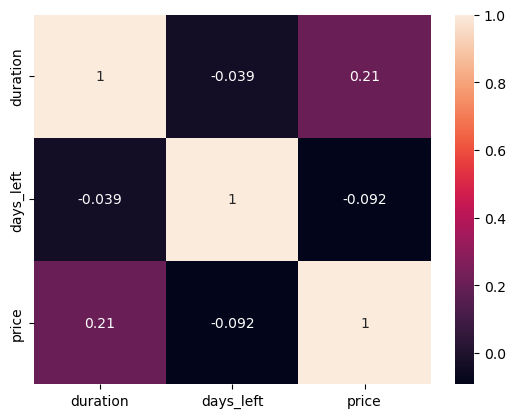

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.show()

We don't drop any column because there is no relationship between Variables.

## a) Univariate Analysis :- 
When we perform analysis on a particular column it is known as univariate analysis.

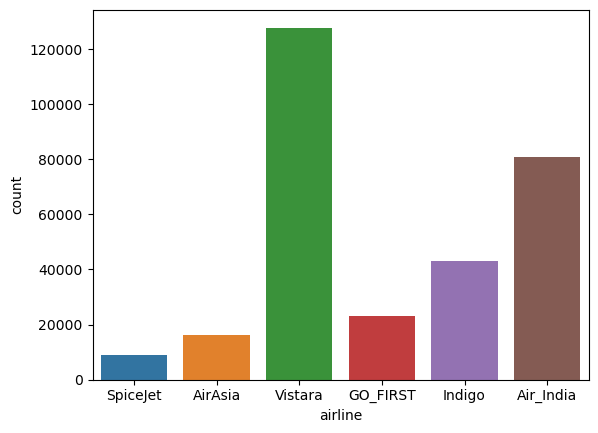

In [16]:
sns.countplot(df['airline'])
plt.show()

Summary :- Majority of people use the Vistara Airlines.

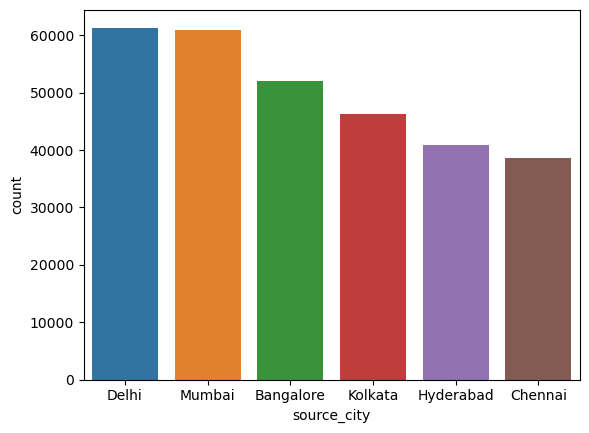

In [17]:
sns.countplot(df['source_city'])
plt.show()

Summary:- Majority of the people travells from Delhi, Mumbai and Banglore.

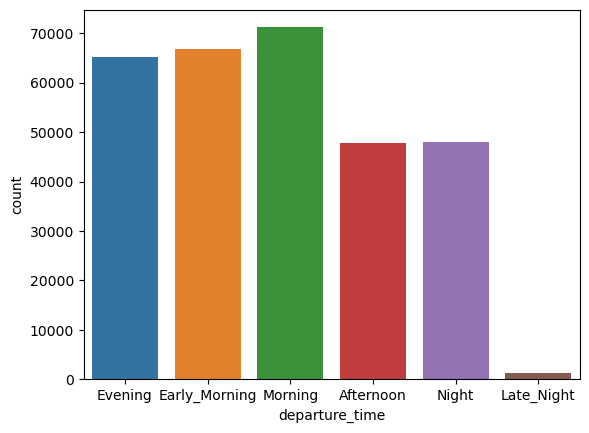

In [18]:
sns.countplot(df['departure_time'])
plt.show()

Summary:- Most flights operate in the morning and evening.

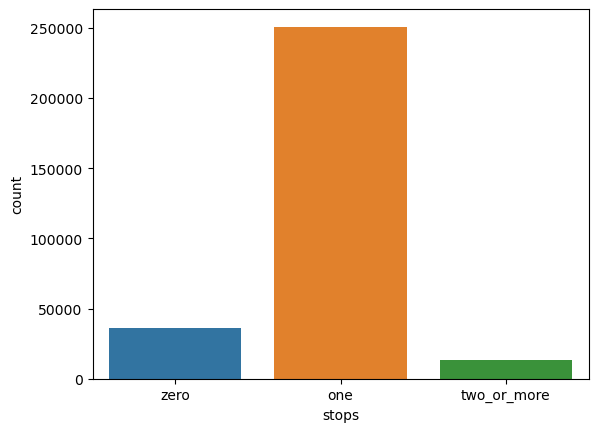

In [19]:
sns.countplot(df['stops'])
plt.show()

Summary: majority of flights takes only one stop during journey.

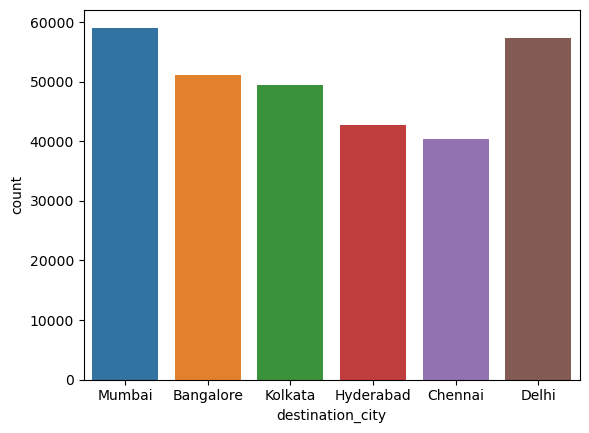

In [20]:
sns.countplot(df['destination_city'])
plt.show()

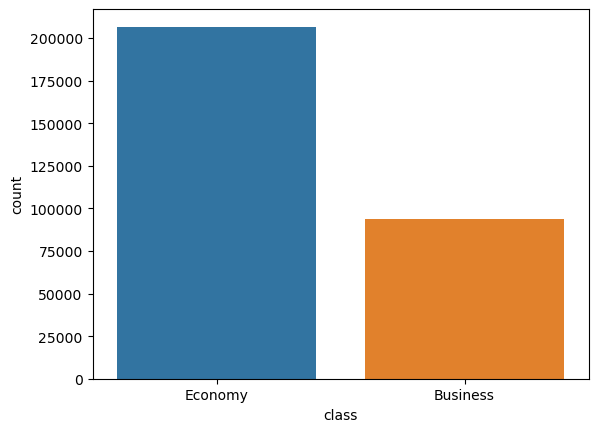

In [21]:
sns.countplot(df['class'])
plt.show()

Summary :- Majority of people travell from Economy class

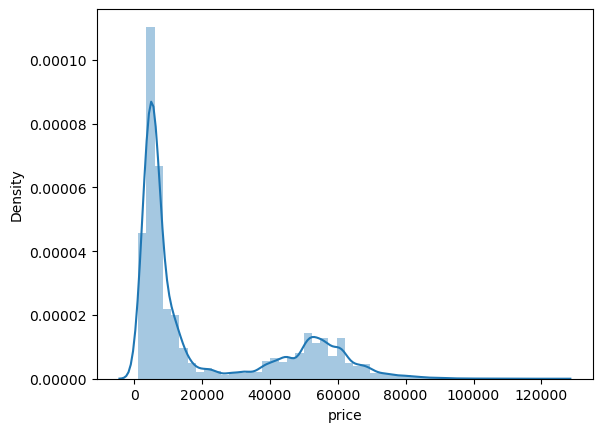

In [22]:
sns.distplot(df['price'])
plt.show()

Summary:- Majority of ticket price is under RS 20000.

## b) Bivariate and multivariate Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int32 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int32(1), int64(2), object(7)
memory usage: 21.8+ MB


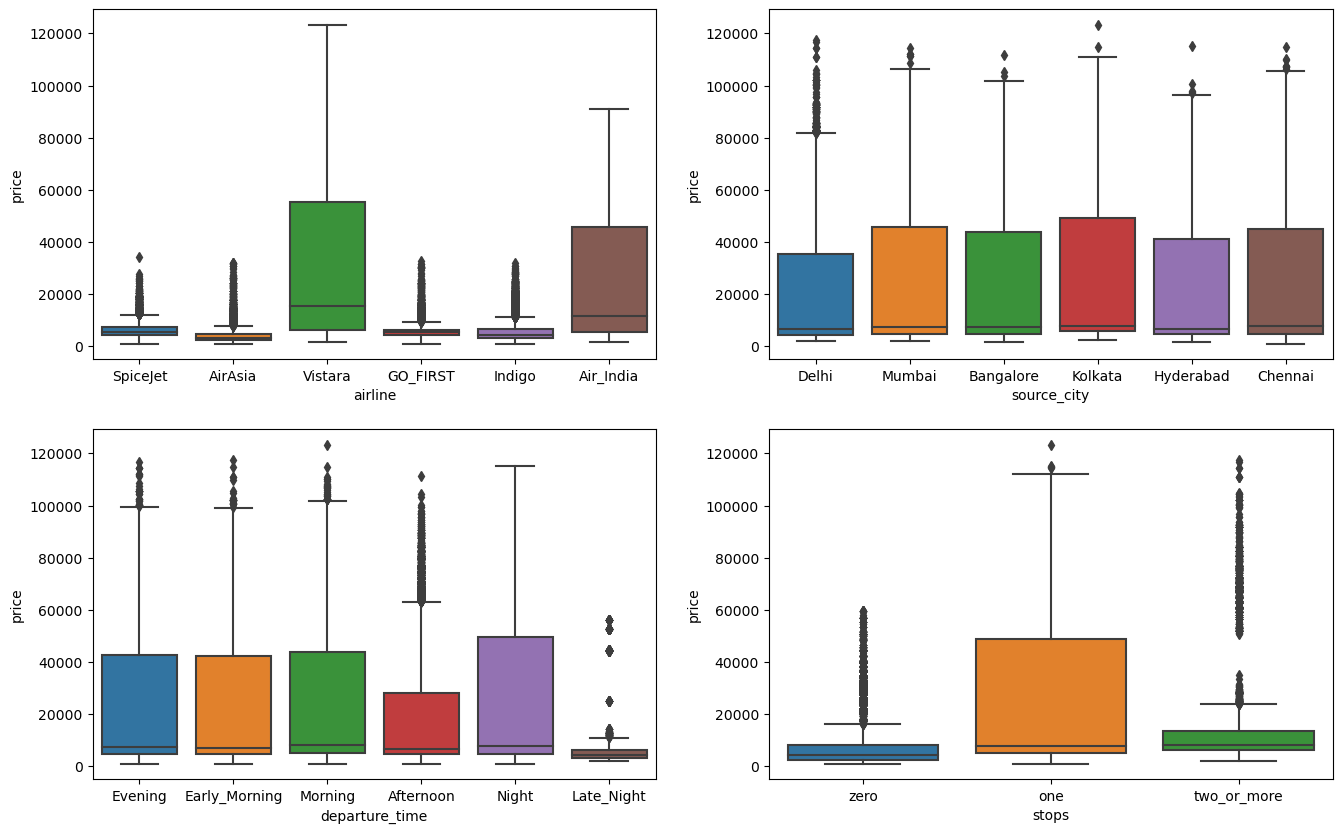

In [24]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.boxplot(x='airline',y='price',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='source_city',y='price',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='departure_time',y='price',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='stops',y='price',data=df)
plt.show()

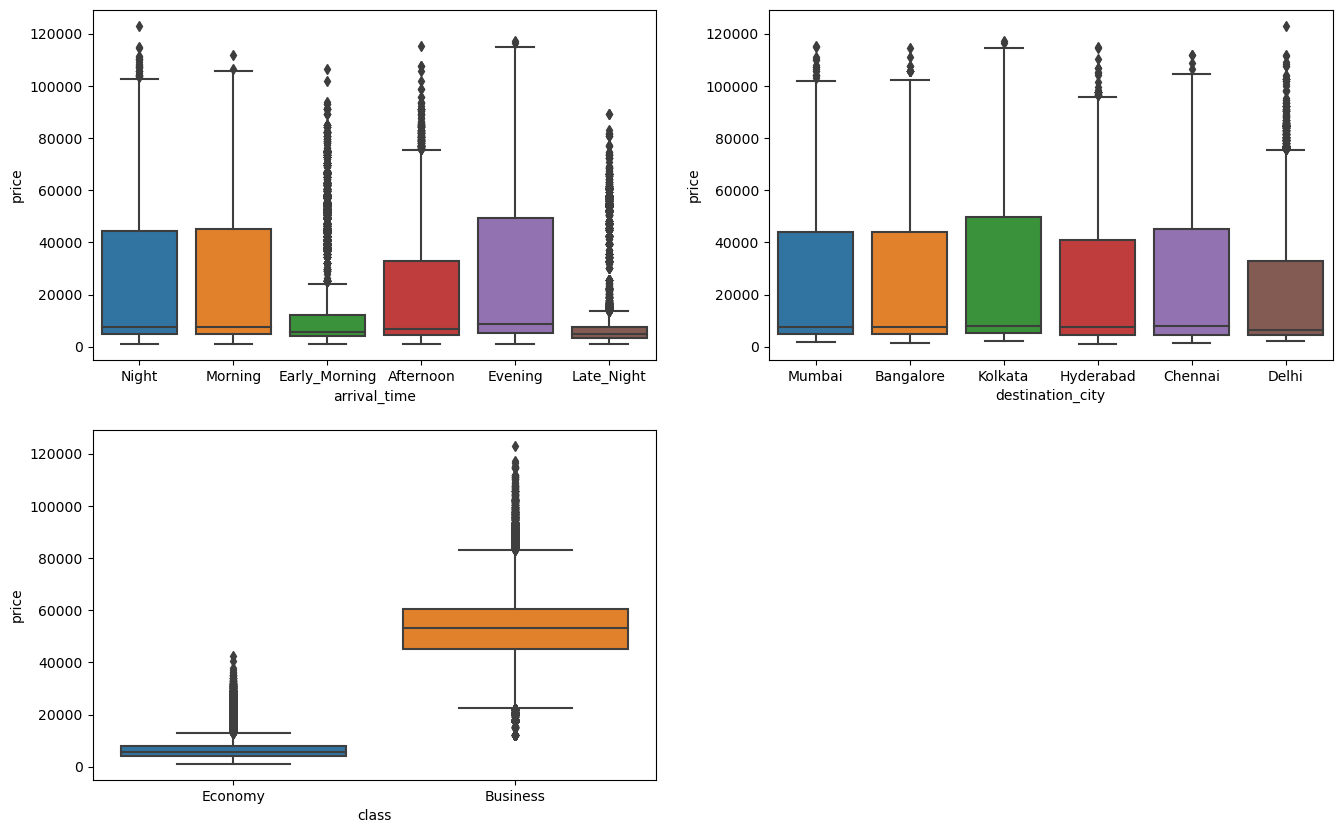

In [25]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.boxplot(x='arrival_time',y='price',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='destination_city',y='price',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='price',data=df)
plt.show()

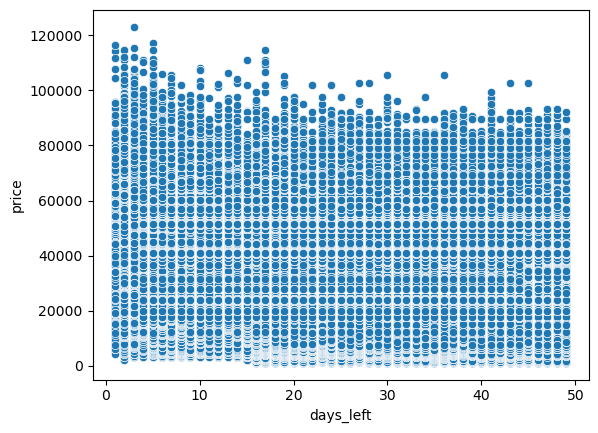

In [26]:
sns.scatterplot(df["days_left"],df['price'])
plt.show()

Summary: Price of ticket depends on days left to flight. The less no. days left to flight the price of ticket is costly.

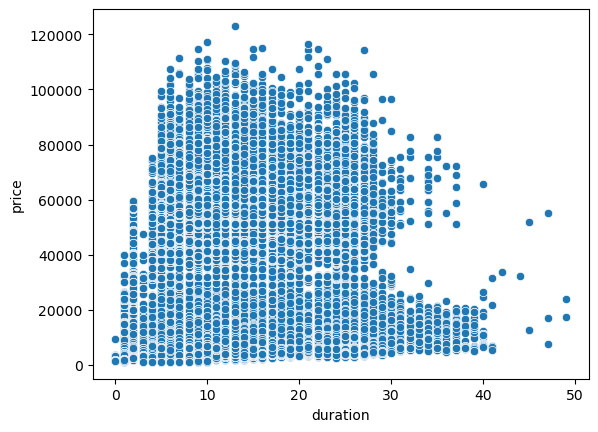

In [27]:
sns.scatterplot(df["duration"],df['price'])
plt.show()

Summary:- The price of ticket is not much depend on duration of flight.

### Compare the Airlines and their prices

<AxesSubplot:xlabel='airline', ylabel='price'>

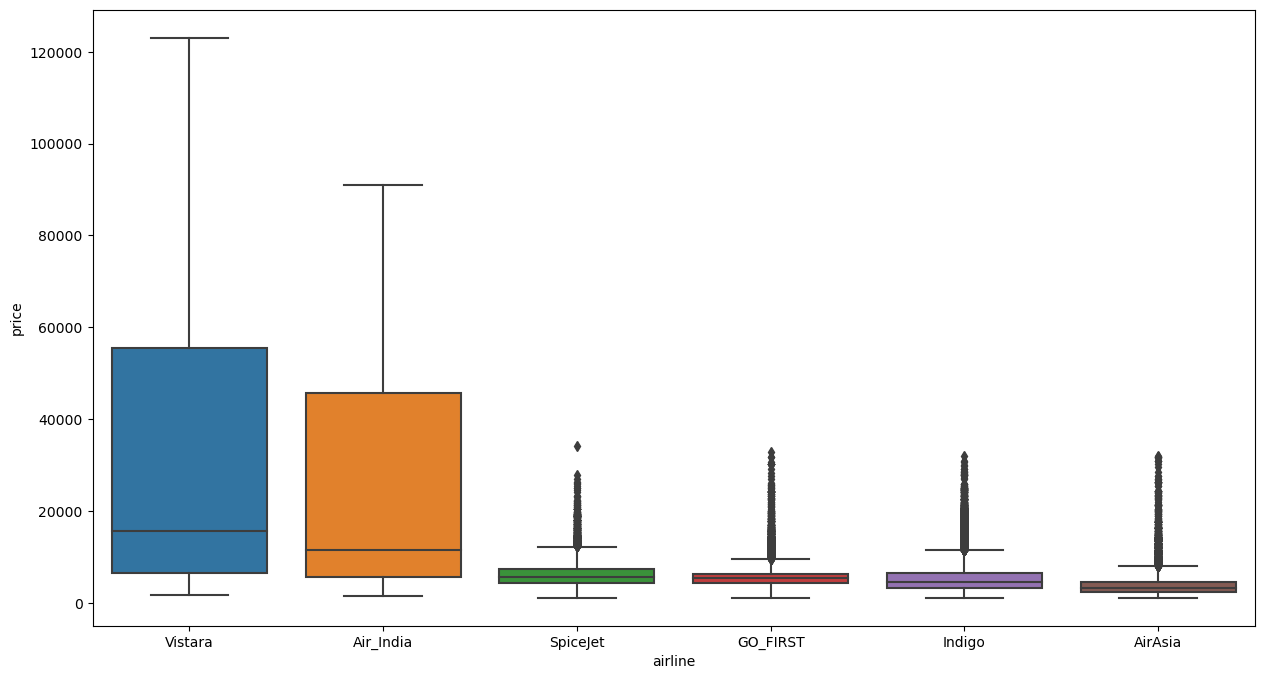

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x='airline',y='price',data=df.sort_values('price',ascending=False))

Summary:-

* Vistara and Air India having high charge
* Air Asia, Indigo, Go First and Spicejet maintains low price

### Compare the Airline Classes and their prices

<AxesSubplot:xlabel='class', ylabel='price'>

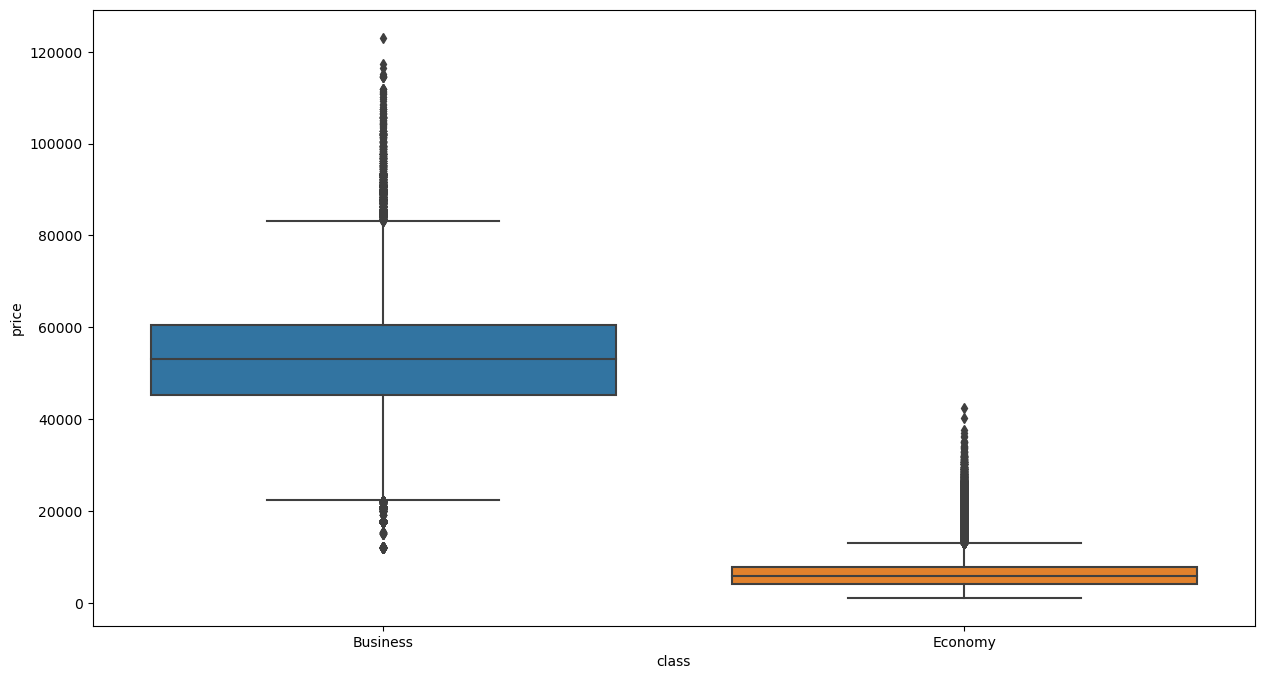

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(x='class',y='price',data=df.sort_values('price',ascending=False))

Summary:-
* In business calss most of passengers are preffer 40000-60000 range flight price
* In Economy class most of passengers are preffer <20000 price range

### Most Expensive Ticket Price

In [30]:
df[df['price']== df['price'].max()]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,Kolkata,Morning,one,Night,Delhi,Business,13,3,123071


###  Most Cheapest Ticket Prices

In [31]:
df[df['price']== df['price'].min()]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,Chennai,Morning,zero,Morning,Hyderabad,Economy,1,16,1105
203808,GO_FIRST,Chennai,Evening,zero,Evening,Hyderabad,Economy,1,16,1105
203908,AirAsia,Chennai,Morning,zero,Morning,Hyderabad,Economy,1,17,1105
203909,GO_FIRST,Chennai,Evening,zero,Evening,Hyderabad,Economy,1,17,1105
204003,AirAsia,Chennai,Morning,zero,Morning,Hyderabad,Economy,1,18,1105
...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,Chennai,Morning,one,Evening,Hyderabad,Economy,7,49,1105
206602,Indigo,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8,49,1105
206603,Indigo,Chennai,Morning,one,Evening,Hyderabad,Economy,9,49,1105
206604,Indigo,Chennai,Afternoon,one,Night,Hyderabad,Economy,9,49,1105


### Comparison of prices among all the airlines and all the starting points

In [32]:
# Use of pivot_table in EDA

df.pivot_table(values='price',index="airline",columns="source_city")

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,4222.787158,3243.964619,4514.854798,3359.273319,4504.940615,3698.312960
Air_India,24874.431796,25415.500908,21899.890758,22458.063853,25233.867742,22540.778419
GO_FIRST,5492.290574,5403.972847,5742.409679,4958.293131,6638.820334,5421.236351
Indigo,5230.785311,4827.233916,5386.570134,4774.240708,6223.829221,5371.185985
SpiceJet,6184.534661,5401.044299,6084.649762,6189.731928,6852.890601,6101.956747
Vistara,30834.436629,30401.842703,28938.500342,27791.447325,32794.276565,31522.101390


## Dealing with Outliers

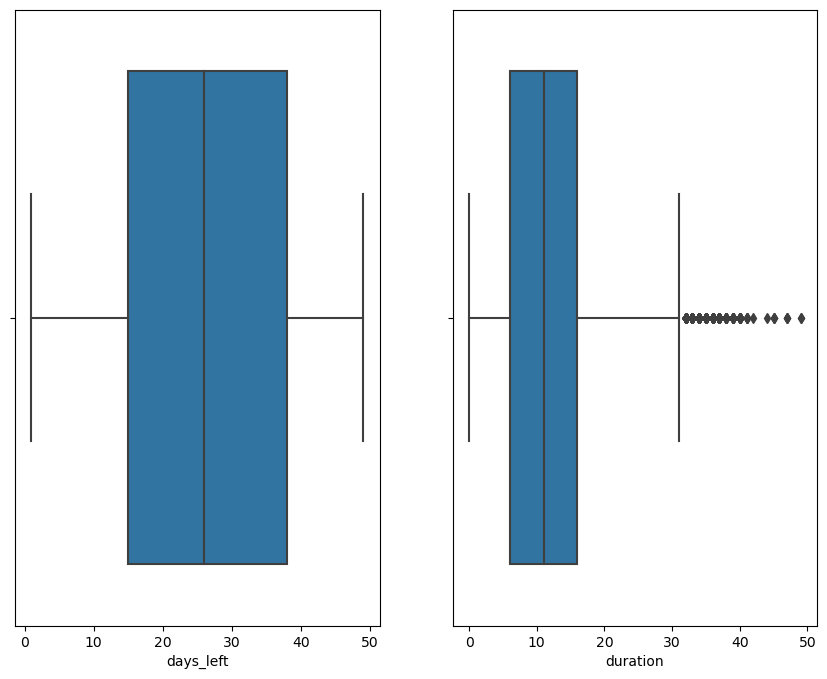

In [33]:
plt.figure(figsize = (16, 8))
plt.subplot(1,3,1)
sns.boxplot(df['days_left'])
plt.subplot(1,3,2)
sns.boxplot(df['duration'])

plt.show()

In [34]:
df = df.drop(index = df[(df['duration'] > 40)].index)

In [35]:
df.shape

(300138, 10)

# Step 3: Data Preparation

In [36]:
df.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2,1,5953


In [37]:
df.nunique()

airline                 6
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration               41
days_left              49
price               12153
dtype: int64

## Dummy Variables

In [38]:
d1 = pd.get_dummies(df['airline'], drop_first = True,prefix='airline')
d2 = pd.get_dummies(df['source_city'], drop_first = True,prefix='source_city')
d3=pd.get_dummies(df["departure_time"], drop_first=True,prefix='departure_time')
d4=pd.get_dummies(df["stops"],drop_first=True,prefix='stops')
d5=pd.get_dummies(df["arrival_time"],drop_first=True,prefix='arrival_time')
d6=pd.get_dummies(df["destination_city"],drop_first=True,prefix='destination_city')
d7=pd.get_dummies(df["class"],drop_first=True,prefix='class')

In [39]:
df=pd.concat([df,d1,d2,d3,d4,d5,d6,d7],axis=1)

In [40]:
df=df.drop(columns=['airline','source_city','departure_time','stops','arrival_time','destination_city','class'])
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2,1,5953,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2,1,5953,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2,1,5956,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2,1,5955,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2,1,5955,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1


## Splitting the Data into Train and Test

In [41]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,train_size=0.8,random_state=20)

## Scaling the Data
We will use MIN MAX SCALER

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [43]:
num_vars=['duration','days_left','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
257237,0.275,0.437500,0.454905,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
68376,0.100,0.791667,0.033272,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
77854,0.050,0.104167,0.048276,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
176339,0.225,1.000000,0.072118,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
58218,0.300,0.625000,0.044594,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


## Dividing into X and Y sets for the Model Building

In [44]:
X_train=df_train.drop("price",axis=1)
y_train=df_train['price']

In [45]:
X_train.head()

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
257237,0.275,0.437500,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
68376,0.100,0.791667,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
77854,0.050,0.104167,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
176339,0.225,1.000000,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
58218,0.300,0.625000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [46]:
y_train.head()

257237    0.454905
68376     0.033272
77854     0.048276
176339    0.072118
58218     0.044594
Name: price, dtype: float64

Our data is done for Feature Selection.

# Building our Model
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (Recursive feature elimination)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe=RFE(lr,n_features_to_select=15, step=1, verbose=0, importance_getter='auto')

lr.fit(X_train,y_train)
rfe=rfe.fit(X_train,y_train)

In [48]:
# RFE Feature Ranking

rfe_ranking = pd.DataFrame({'features' : X_train.columns,'rank' : rfe.ranking_, 'support': rfe.support_ }).sort_values(by='rank',ascending=True)
rfe_ranking

,features,rank,support
0,duration,1,True
27,destination_city_Kolkata,1,True
26,destination_city_Hyderabad,1,True
25,destination_city_Delhi,1,True
19,arrival_time_Early_Morning,1,True
18,stops_zero,1,True
17,stops_two_or_more,1,True
10,source_city_Kolkata,1,True
9,source_city_Hyderabad,1,True
29,class_Economy,1,True


* X_train.columns :- Features of training data
* rfe.ranking_ :- Important Features rank wise 
* rfe.support_ :- Whether the feature is important or not (i.e: True/False) 

In [49]:
# Select only those features which are important

col=X_train.columns[rfe.support_]
col

Index(['duration', 'days_left', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Hyderabad',
       'source_city_Kolkata', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Early_Morning', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'class_Economy'],
      dtype='object')

In [50]:
# These are the columns which are not important for model

X_train.columns[~rfe.support_]

Index(['airline_Air_India', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Mumbai'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

## Model 1

In [51]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [52]:
#adding constant variable

import statsmodels.api as sm

X_train_rfe1=sm.add_constant(X_train_rfe)

In [53]:
# Running the linear model

lm=sm.OLS(y_train,X_train_rfe1).fit()

In [54]:
#summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.629e+05
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:10:11   Log-Likelihood:             3.5265e+05
No. Observations:              240110   AIC:                        -7.053e+05
Df Residuals:                  240094   BIC:                        -7.051e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Description of some of the terms in the table : 
 

* R-squared : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained

    
* Adj. R-squared : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.

    
* F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.

    
* coef : the coefficients of the independent variables and the constant term in the equation.

    
* t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error

# Note:- 


* Remember that your R-squared is always greater than Adj. R-squared. It is a sign of well fit model.


* Otherwise you have to reselect your features and build model again.

In [55]:
# Calculate the VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,duration,3.62
1,days_left,3.49
14,class_Economy,3.42
5,airline_Vistara,1.96
3,airline_Indigo,1.62
13,destination_city_Kolkata,1.36
9,stops_zero,1.35
11,destination_city_Delhi,1.35
12,destination_city_Hyderabad,1.31
2,airline_GO_FIRST,1.30


* Variance Inflation Factor(VIF) of all features are good.


* The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

### Check the accuracy score of our model

In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(X_train_rfe1,y_train)

model.score(X_train_rfe1,y_train)

0.9105430114700321

* The accuracy of model is 91% but I will improve the accuracy score by dropping 'duration'.


* Logically we don't drop duration duration because price of the ticket is depends on duration.


* But while doing Data Visulation I see that duration doesn't get much impact on ticket price.


* So, I will drop 'duration' and make model again. 

## Model 2

In [57]:
X_train_rfe=X_train_rfe.drop(['duration'],axis=1)

In [58]:
X_train_rfe2=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.743e+05
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:10:17   Log-Likelihood:             3.5248e+05
No. Observations:              240110   AIC:                        -7.049e+05
Df Residuals:                  240095   BIC:                        -7.048e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.54
3,airline_Indigo,1.37
5,airline_Vistara,1.36
14,class_Economy,1.23
2,airline_GO_FIRST,1.21
13,destination_city_Kolkata,1.16
11,destination_city_Delhi,1.14
12,destination_city_Hyderabad,1.14
4,airline_SpiceJet,1.10
7,source_city_Kolkata,1.08


In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(X_train_rfe2,y_train)

model.score(X_train_rfe2,y_train)

0.9104172733206114

In [61]:
X_train_rfe.head()

,days_left,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Hyderabad,source_city_Kolkata,stops_two_or_more,stops_zero,arrival_time_Early_Morning,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,class_Economy
257237,0.437500,0,0,0,1,0,0,0,0,0,0,1,0,0
68376,0.791667,0,1,0,0,0,0,0,0,0,0,0,1,1
77854,0.104167,0,0,0,1,0,0,0,1,0,0,0,0,1
176339,1.000000,0,0,0,1,1,0,0,0,0,0,0,1,1
58218,0.625000,0,0,0,0,0,0,0,0,0,0,0,0,1


### As we see by dropping 'duration' doesn't impact on accuracy score. The accuracy score of model will remian same as 91%. 

# Check the Assumption of Linear Regression :-

## 1) Residual Analysis of the train data / Normality of residuals

* Checking if the error terms are normally distributed.


* When you plot your error/residuals it should be normally distributed


* Mean should be close to zero


* More values are closer to zero and some values are far away from zero

In [62]:
y_train_price = lr.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

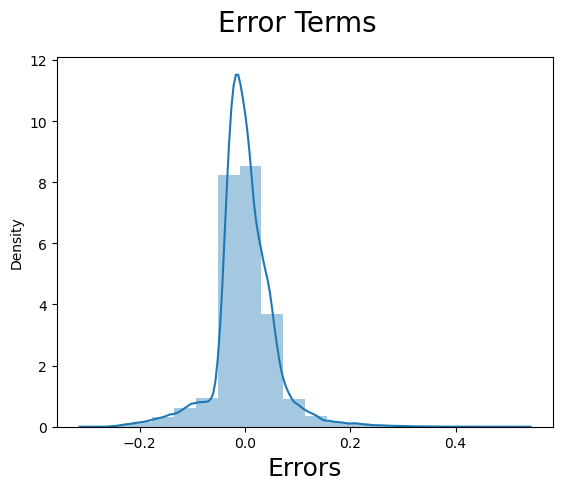

In [63]:
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18)# X-label

## 2) Multicollinearity :- There is no correlation between any input variable. All the input variables are independent.



* Most research papers consider a VIF (Variance Inflation Factor) > 10 as an indicator of multicollinearity, but some choose a more conservative threshold of 5 or even 2.5. 


* If many features have multicollinearity then we can drop them but one by one not drop all features at same time.


In [64]:
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.54
3,airline_Indigo,1.37
5,airline_Vistara,1.36
14,class_Economy,1.23
2,airline_GO_FIRST,1.21
13,destination_city_Kolkata,1.16
11,destination_city_Delhi,1.14
12,destination_city_Hyderabad,1.14
4,airline_SpiceJet,1.10
7,source_city_Kolkata,1.08


const column has more than 10 VIF but it is a additional column so we ignore it. 

## 3) Linear Relationship between all input variables and output variable.

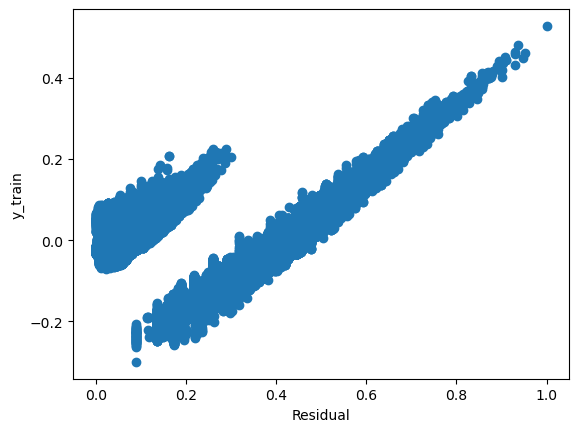

In [65]:
res=(y_train-y_train_price)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

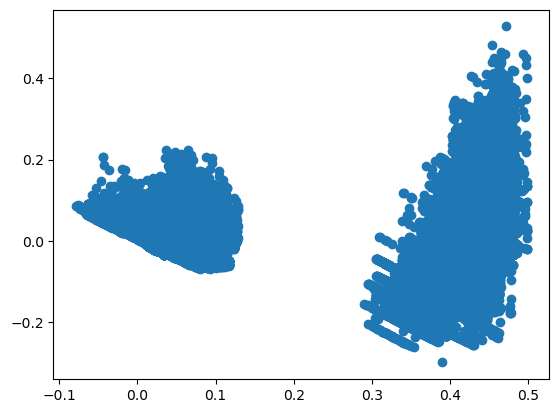

In [66]:
res=(y_train-y_train_price)
plt.scatter(y_train_price,res)
plt.show()

## 4) Homoscedastasticity


* Homo means same and scedastasticity means spread or scatter. It means having the same scatter. 


* It is related to residual. When you plot your residuals it should having the same spread. If the spread of residuals are not equal it is called Hetroscedastasticity. 


* How to find Homoscedastasticity :- y_prediction is in Y axis and residuals is in X axis

In [67]:
X_t=X_train_rfe2.iloc[:,0].values
X_t.shape

(240110,)

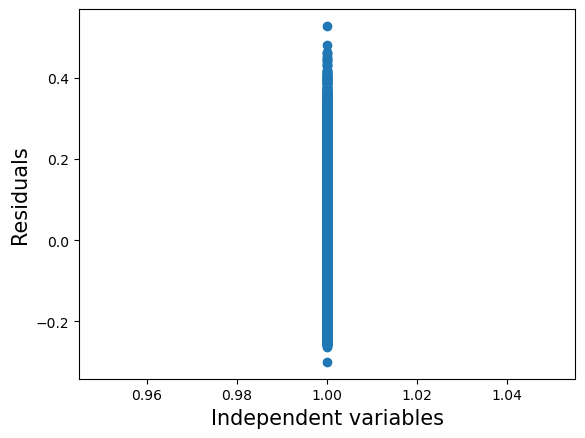

In [68]:
"""TEST"""

#PLotting the residuals to check for pattern existance

#Checking the assumption of autocorrelation and homoscedasticity 

plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=15)              
plt.xlabel('Independent variables', fontsize=15)                          
plt.ylabel('Residuals', fontsize=15)  
plt.show()

## 5) No autocorrelation of Errors

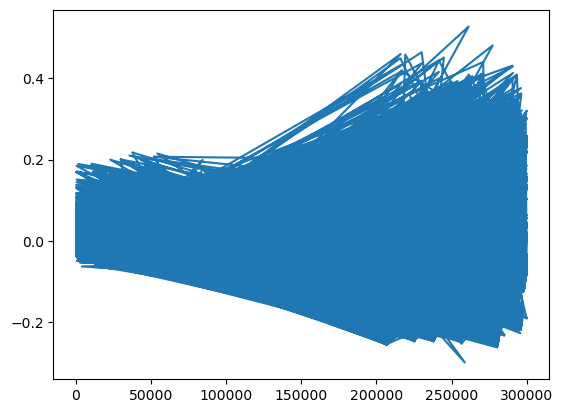

In [69]:
plt.plot(res)

 All the assumptions are fulfill.

# Make predictions on the testing set


### Model Evaluation


Model evaluation in linear regression refers to the process of assessing how well a linear regression model fits the data it was trained on, and how well it is likely to perform on new, unseen data. This is important because the goal of linear regression is to create a model that can make accurate predictions about new data, not just fit the training data well.

In [70]:
num_vars=['duration','days_left','price']

df_test[num_vars]=scaler.transform(df_test[num_vars])

#Dividing into X_test and y_test

X_test = df_test.drop('price',axis=1)
y_test = df_test['price']

In [71]:
# Now using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_rfe.columns]

In [72]:
# Adding a constant variable

X_test_new = sm.add_constant(X_test_new)

In [73]:
# Making predictions

y_pred = lm.predict(X_test_new)

### 1) Residual plots: This is a visual way to evaluate the goodness-of-fit of the linear regression model. Residuals are the differences between the predicted and actual values, and a good model should have residuals that are randomly distributed around 0, with no pattern or trend

Text(0, 0.5, 'y_pred')

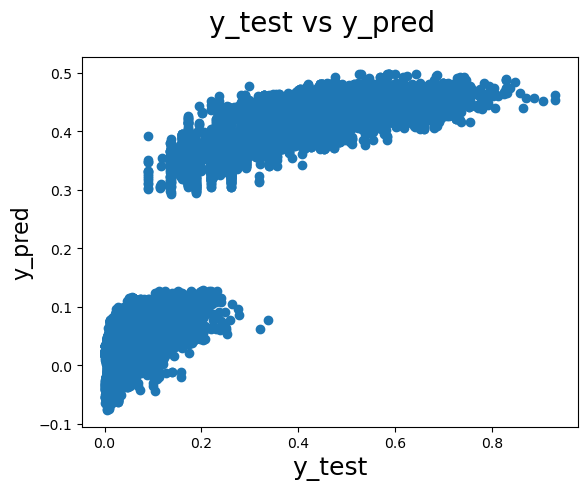

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### 2) Mean Squared Error (MSE): This measures the average squared difference between the predicted values and the actual values of the dependent variable in the test set. (The lower the MSE value, the better the performance of the model).

In [75]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.0030759985977278363

### 3) Root Mean Squared Error (RMSE): This is similar to MSE, but the square root of the average squared difference is taken, which gives a measure of the error in the same units as the dependent variable.

In [76]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.055461685853639864

# r2_score




### 4) R-squared: This measures the proportion of variance in the dependent variable that is explained by the independent variables in the model. R-squared values range from 0 to 1, with higher values indicating a better fit.



### 5) Adjusted R-squared: This is similar to R-squared, but adjusts for the number of independent variables in the model. It penalizes models with too many variables that may overfit the data.

In [77]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred)

0.9105858350816762

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.743e+05
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:11:04   Log-Likelihood:             3.5248e+05
No. Observations:              240110   AIC:                        -7.049e+05
Df Residuals:                  240095   BIC:                        -7.048e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## We can see that the equation of our best fitted line is:

price =  0.4335 + (- 0.0516 * days_left) + (0.0112 * airline_GO_FIRST) + (0.0143 * airline_Indigo) + (0.0174 * airline_SpiceJet) + (0.0329 * airline_Vistara) + (-0.0100 * source_city_Hyderabad) + (0.0174 * source_city_Kolkata) + (0.0178 * stops_two_or_more) + (-0.0668 * stops_zero) + (-0.0126 * arrival_time_Early_Morning) + (-0.0096 * destination_city_Delhi) + (-0.0123 * destination_city_Hyderabad) + (-0.128 * destination_city_Kolkata) + (-0.3685 * class_Economy)

* Accuracy i.e R2_Score comes out to be 91.05%


* Root mean square error (RMSE) comes out to be 0.055


* Mean square error (MSE) comes out to be 0.003


* R-squared: 0.910,


* Adj. R-squared: 0.910


* F-statistic: 1.743e+05

# Doing the same using sklearn.linear_model

In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_rfe2,y_train)
re=lr.predict(X_test_new)

In [80]:
re.shape

(60028,)

In [81]:
lr.score(X_test_new,y_test)  #model.score is another way of checking r_2 score

0.9105858350816762

In [82]:
r2_score(y_true=y_test,y_pred=re)

0.9105858350816762

In [83]:
print(lr.intercept_)
print(lr.coef_)

0.43339879371840273
[ 0.         -0.05158788  0.01119299  0.01430822  0.01742721  0.03285603
 -0.01000259  0.01738975  0.01780116 -0.06680352 -0.01264637 -0.0096135
 -0.01230519  0.01280392 -0.36848516]


the intercept and coefficient above comes out to be same as in statsmodel.api

### In the context of linear regression, the cross-validation score is a measure of how well the linear regression model generalizes to new data. It is calculated by taking the average of the R-squared values obtained in each fold of the cross-validation process. A higher cross-validation score indicates better performance of the model on unseen data.

In [84]:
#cross_val_score in module sklearn.model_selection._validation
from sklearn.model_selection import cross_val_score
cvr = cross_val_score(lr,X_train_rfe2,y_train, cv=20, n_jobs=1, verbose=5, fit_params=None, pre_dispatch='2*n_jobs', error_score=2)
cvr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.911) total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.910) total time=   0.1s
[CV] END ................................ score: (test=0.912) total time=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV] END ................................ score: (test=0.910) total time=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] END ................................ score: (test=0.911) total time=   0.2s
[CV] END ................................ score: (test=0.912) total time=   0.1s
[CV] END ................................ score: (test=0.911) total time=   0.1s
[CV] END ................................ score: (test=0.913) total time=   0.1s
[CV] END ................................ score: (test=0.910) total time=   0.1s
[CV] END ................................ score: (test=0.911) total time=   0.1s
[CV] END ................................ score: (test=0.911) total time=   0.2s
[CV] END ................................ score: (test=0.910) total time=   0.1s
[CV] END ................................ score: (test=0.908) total time=   0.1s
[CV] END ................................ score: (test=0.909) total time=   0.1s
[CV] END ................................ score: (test=0.908) total time=   0.1s
[CV] END ................................ score: (test=0.911) total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.6s finished


array([0.91052434, 0.91004523, 0.91164439, 0.90988249, 0.91125739,
       0.91171289, 0.91126525, 0.91254768, 0.91021311, 0.9105324 ,
       0.91096685, 0.90990325, 0.9078085 , 0.90931683, 0.9082336 ,
       0.91081171, 0.91062346, 0.91074963, 0.90985683, 0.91009728])

In [85]:
print("cross_val_score mean and std : %0.2f (+/- %0.2f)" % (cvr.mean(), cvr.std() * 2))

cross_val_score mean and std : 0.91 (+/- 0.00)


In [86]:
cvr.mean()

0.9103996543654013

In [87]:
cvr.std()

0.0010887821172500462

## We can Confirm the following details for the equation of our best fitted line is:

y = c + (m1 * x1) + (m2 * x2) + (m3 * x3) .... 

price =  0.4335 + (- 0.0516 * days_left) + (0.0112 * airline_GO_FIRST) + (0.0143 * airline_Indigo) + (0.0174 * airline_SpiceJet) + (0.0329 * airline_Vistara) + (-0.0100 * source_city_Hyderabad) + (0.0174 * source_city_Kolkata) + (0.0178 * stops_two_or_more) + (-0.0668 * stops_zero) + (-0.0126 * arrival_time_Early_Morning) + (-0.0096 * destination_city_Delhi) + (-0.0123 * destination_city_Hyderabad) + (-0.128 * destination_city_Kolkata) + (-0.3685 * class_Economy)

* Accuracy i.e R2_Score comes out to be 91.05%


* Root mean square error (RMSE) comes out to be 0.055


* Mean square error (MSE) comes out to be 0.003


* R-squared: 0.910,


* Adj. R-squared: 0.910


* F-statistic: 1.743e+05

## Save Trained Model To a File Using Joblib

In [88]:
import joblib

In [89]:
joblib.dump(lr, 'FLIGHT_FARE_PREDICTION_joblib')

['FLIGHT_FARE_PREDICTION_joblib']

Our Linear Regression Model is saved. 